In [1]:
import pandas as pd

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [2]:
X_train = data_train.loc[ : , data_train.columns != 'y'] 
y_train = data_train["y"]
X_test = data_test.loc[ : , data_test.columns != 'y'] 
y_test = data_test["y"]

In [3]:
#X_train.describe()
#X_train.info()
X_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.832164,0.734772,0.626653,0.238078,0.338718,0.364629,0.533504,0.484752,0.673383,0.394322,0.726064,0.813944,0.686857,0.442066,0.208592,0.846246,0.416390,0.681197,0.415797,0.351630
1,0.434020,0.054741,0.316852,0.229558,0.714776,0.185191,0.288082,0.040074,0.588396,0.671829,0.780675,0.862059,0.590721,0.084614,0.890323,0.501312,0.084612,0.751885,0.696986,0.664690
2,0.167477,0.627895,0.379868,0.834608,0.286843,0.146932,0.745286,0.063496,0.872345,0.137706,0.174549,0.238914,0.606350,0.906995,0.722755,0.957155,0.772042,0.942410,0.250488,0.401736
3,0.917487,0.349867,0.026223,0.904135,0.189632,0.068428,0.424099,0.097569,0.669446,0.264504,0.720960,0.998434,0.676528,0.436011,0.510557,0.254132,0.638738,0.262307,0.917623,0.252353
4,0.262515,0.128063,0.684576,0.452624,0.384034,0.032154,0.912727,0.058140,0.946419,0.172531,0.924590,0.852647,0.534161,0.569734,0.293528,0.380042,0.304119,0.465901,0.748553,0.740586


In [4]:
y_train.describe()

count    200.000000
mean       0.485000
std        0.501029
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: y, dtype: float64

In [5]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,y_train) # fitting the data

GaussianNB()

In [6]:
nv.fit(X_train,y_train).score(X_train,y_train)

0.875

In [7]:
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [8]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test) 
prob=nv.predict_proba(X_test)[::,1] 
accuracy_score(y_test,y_pred) 

0.794

In [9]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Compute and print confusion matrix using crosstab function
conf_matrix = pd.crosstab(y_test, y_pred,
                       rownames = ["Actual"], 
                       colnames = ["Predicted"], 
                       margins = True)
                      
# Print the confusion matrix
print(conf_matrix)

Predicted    0    1   All
Actual                   
0          403   88   491
1          118  391   509
All        521  479  1000


In [10]:
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       491
           1       0.82      0.77      0.79       509

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000



0.794

In [11]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, y_pred)))

F1 Score: 0.791497975708502


In [12]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.85%


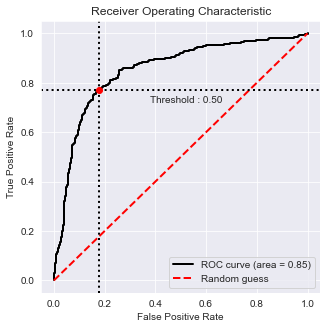

In [13]:
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [14]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.768172888015717